# Table of Contents :

# 1.) Problem Statement
# 2.) Data Loading and Description
# 3.) Data Exploration/Preprocessing (EDA)
# 4.) Feature Engineering for Model Building
# 5.) Model Building
# 6.) Selecting Best Model
# 7.) Hyper parameter Tuning
# 8.) Model Saving
# 9.) Conclusion

                                   # Problem Statement

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Inspiration /Label 

Our task is to make a model that can consider the data provided and predict the Average Price.

In [77]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")


In [16]:
#Loading Dataset

df = pd.read_csv(r"E:\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Description

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

# Data Exploration/Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [18]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [19]:
df.shape

(18249, 14)

In [20]:
df = df.drop(columns=['Unnamed: 0'] , axis=1 )

#Dropping Coloumn "Unnamed :0" as it only contains serial no.

In [21]:
#Checking unique elements

for i in df.columns:
    print(i ,':', len(df[i].unique()))

Date : 169
AveragePrice : 259
Total Volume : 18237
4046 : 17702
4225 : 18103
4770 : 12071
Total Bags : 18097
Small Bags : 17321
Large Bags : 15082
XLarge Bags : 5588
type : 2
year : 4
region : 54


In [22]:
df.value_counts(['type'])


type        
conventional    9126
organic         9123
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

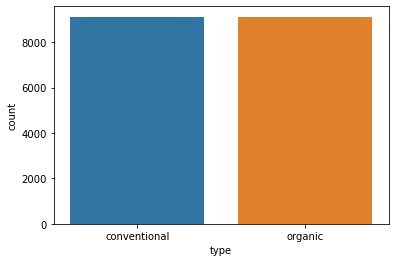

In [23]:
sns.countplot('type',data=df)

#As seen below data is perfectly balanced 

In [24]:

df.value_counts(['year'])


year
2017    5722
2016    5616
2015    5615
2018    1296
dtype: int64

In [25]:
df.value_counts(['region'])

region             
Nashville              338
Detroit                338
MiamiFtLauderdale      338
Louisville             338
LosAngeles             338
LasVegas               338
Jacksonville           338
Indianapolis           338
Houston                338
HartfordSpringfield    338
HarrisburgScranton     338
GreatLakes             338
GrandRapids            338
Denver                 338
West                   338
DallasFtWorth          338
Columbus               338
CincinnatiDayton       338
Chicago                338
Charlotte              338
California             338
BuffaloRochester       338
Boston                 338
Boise                  338
BaltimoreWashington    338
Atlanta                338
Midsouth               338
Albany                 338
NewOrleansMobile       338
NewYork                338
TotalUS                338
Tampa                  338
Syracuse               338
StLouis                338
Spokane                338
Southeast              338
SouthCen

In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Data Visualization

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

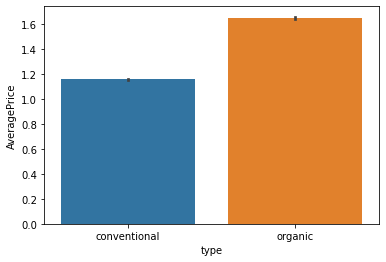

In [27]:
#Comparing Every feature with label

sns.barplot(x='type' , y='AveragePrice' , data=df)

# Average price of Organic Avocado is more as compared to conventional

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

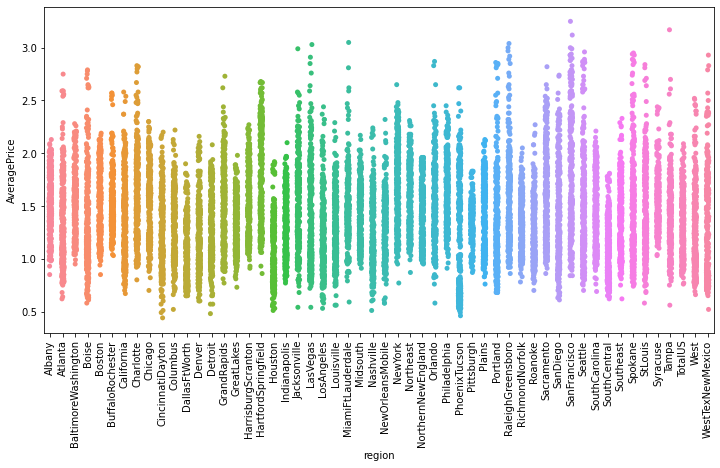

In [28]:
plt.figure(figsize=(12,6))
sns.stripplot(x='region' , y='AveragePrice' , data=df )
plt.xticks(rotation=90)

# Average price of San Francisco region is higher as compare to other states

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

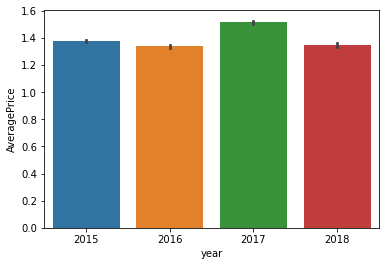

In [186]:

sns.barplot(x='year' , y='AveragePrice', data=df)

The Average Price of Year 2017 is more

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

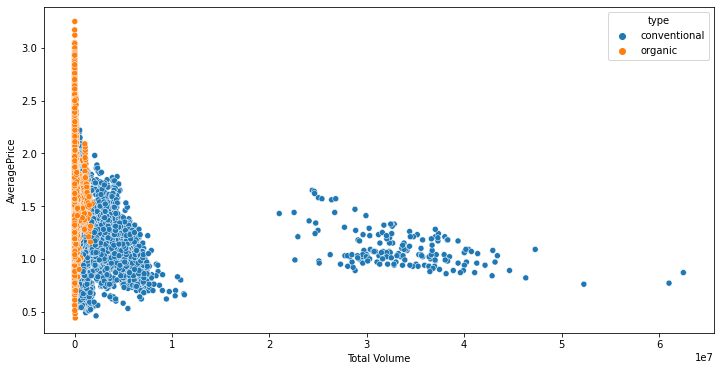

In [187]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total Volume' , y='AveragePrice' , hue='type'  , data=df)

# Looks like conventional avocado has in more number of volume as compared with organic ones.

In [29]:
#Converting Date from object type to date type 

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

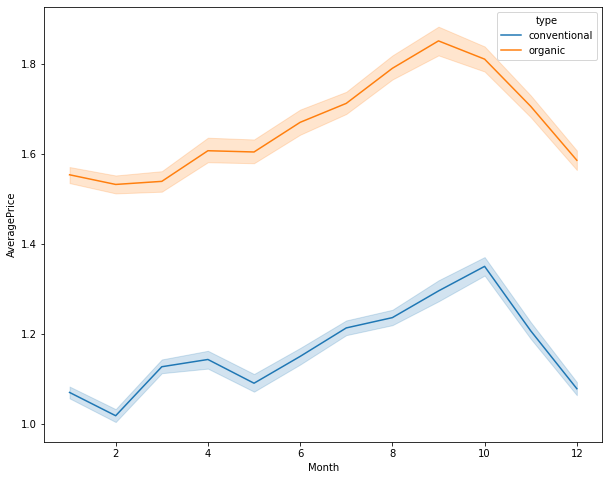

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Month' , y='AveragePrice' , hue='type' , data=df)
plt.show()

# From Month 6th(June) to 10th(October) there is increase in Average Price in both types of Avocadoes

In [31]:
#Encoding object data into integer

label_col = ['type','region']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[label_col]=df[label_col].apply(lambda x : label.fit_transform(x))

<AxesSubplot:>

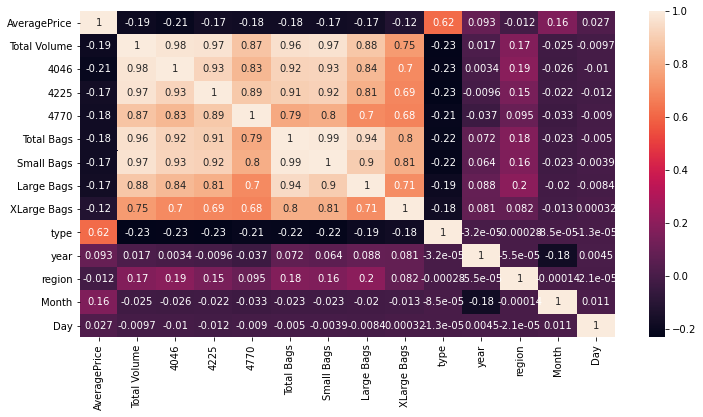

In [32]:
#Checking for correlation between Variables

plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot=True)

In [37]:
#Dropping coloumn Date as we are alredy having Day,Month and Year respectively

df1=df.drop('Date',axis=1)
df1.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,1,7


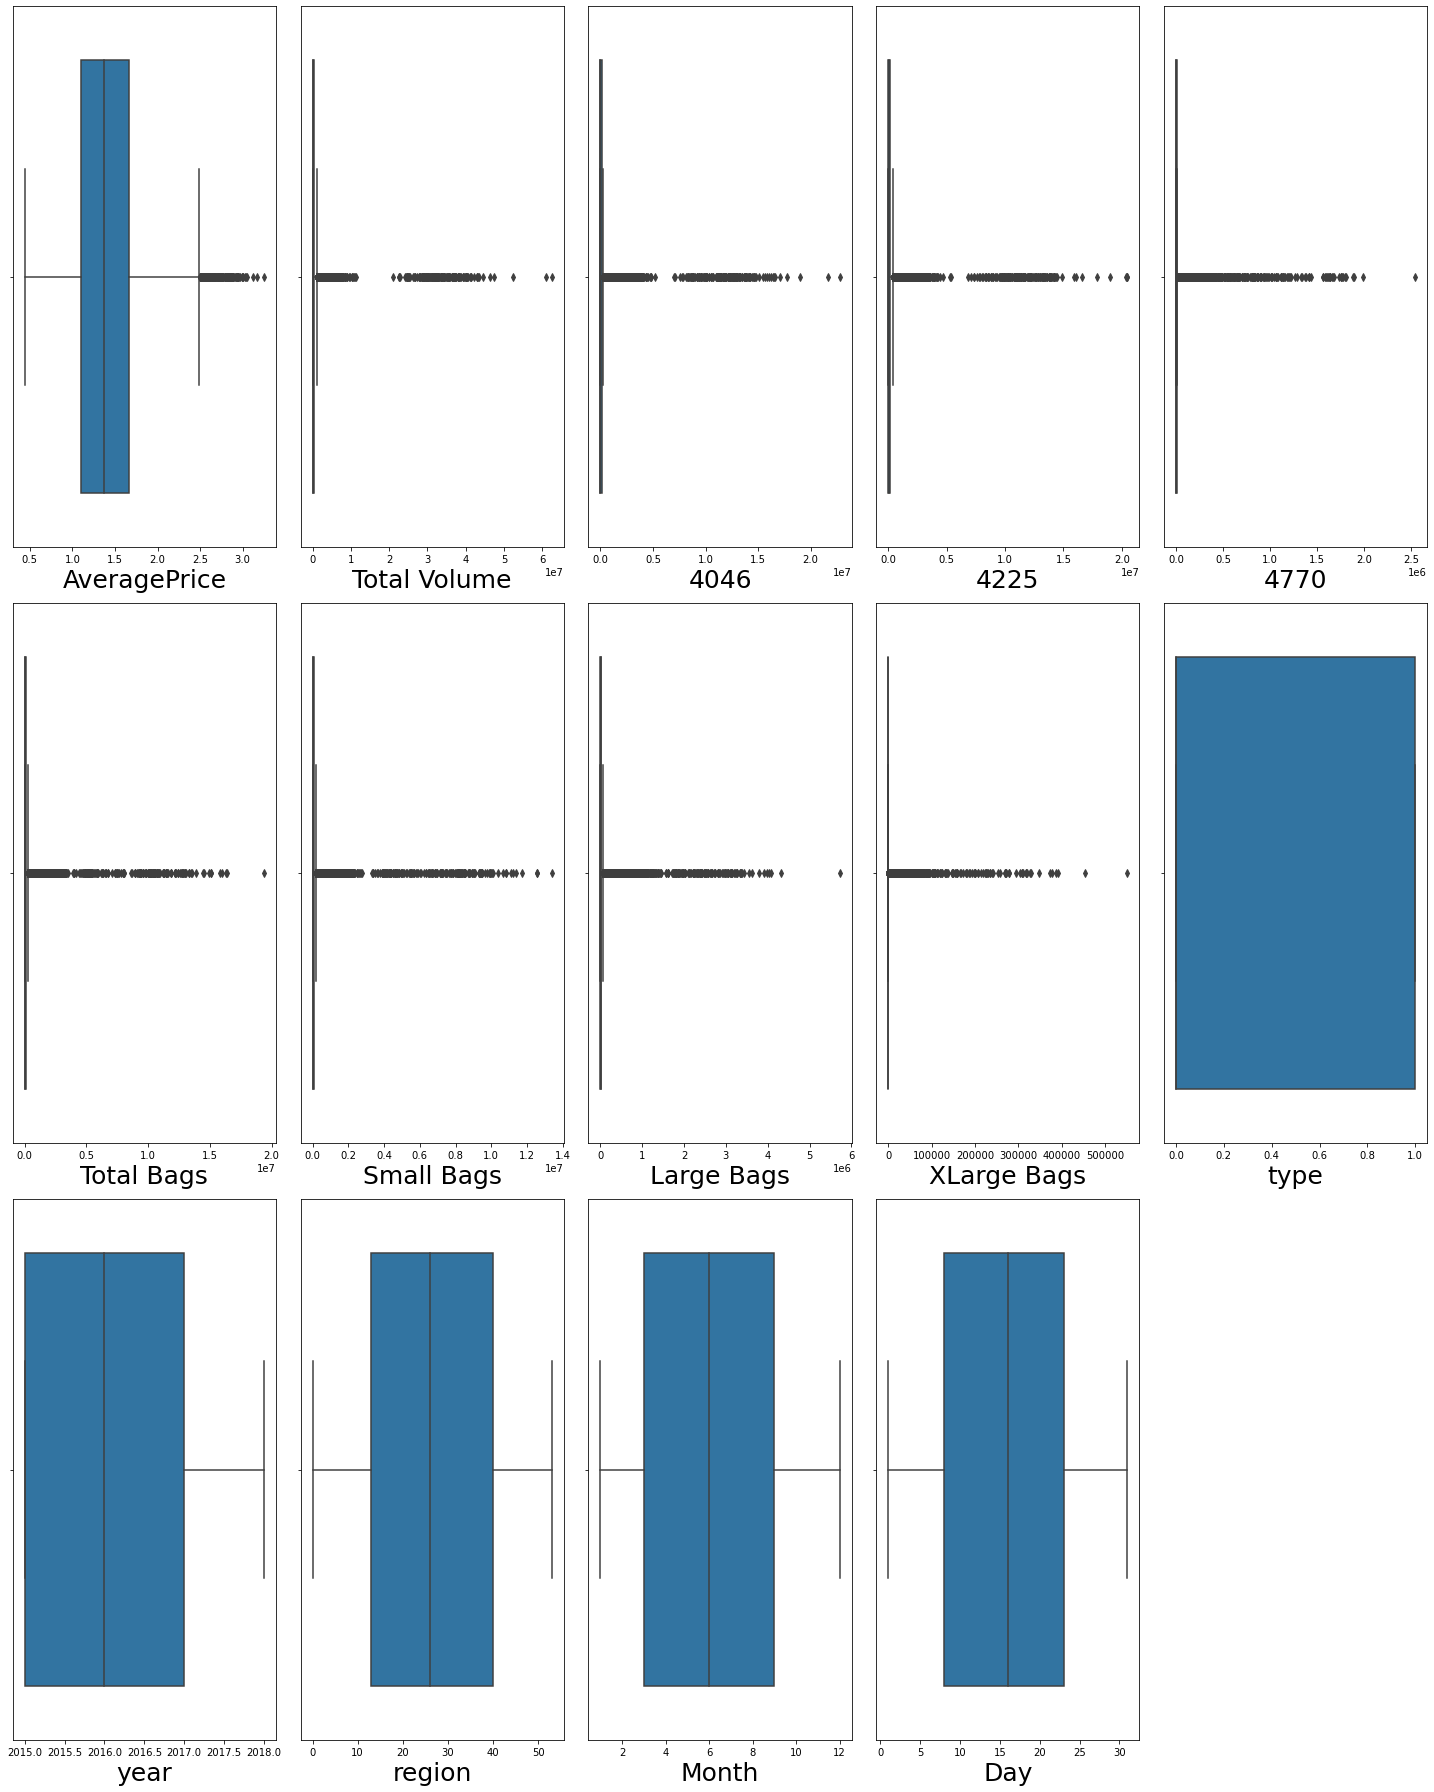

In [193]:
#Checking for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

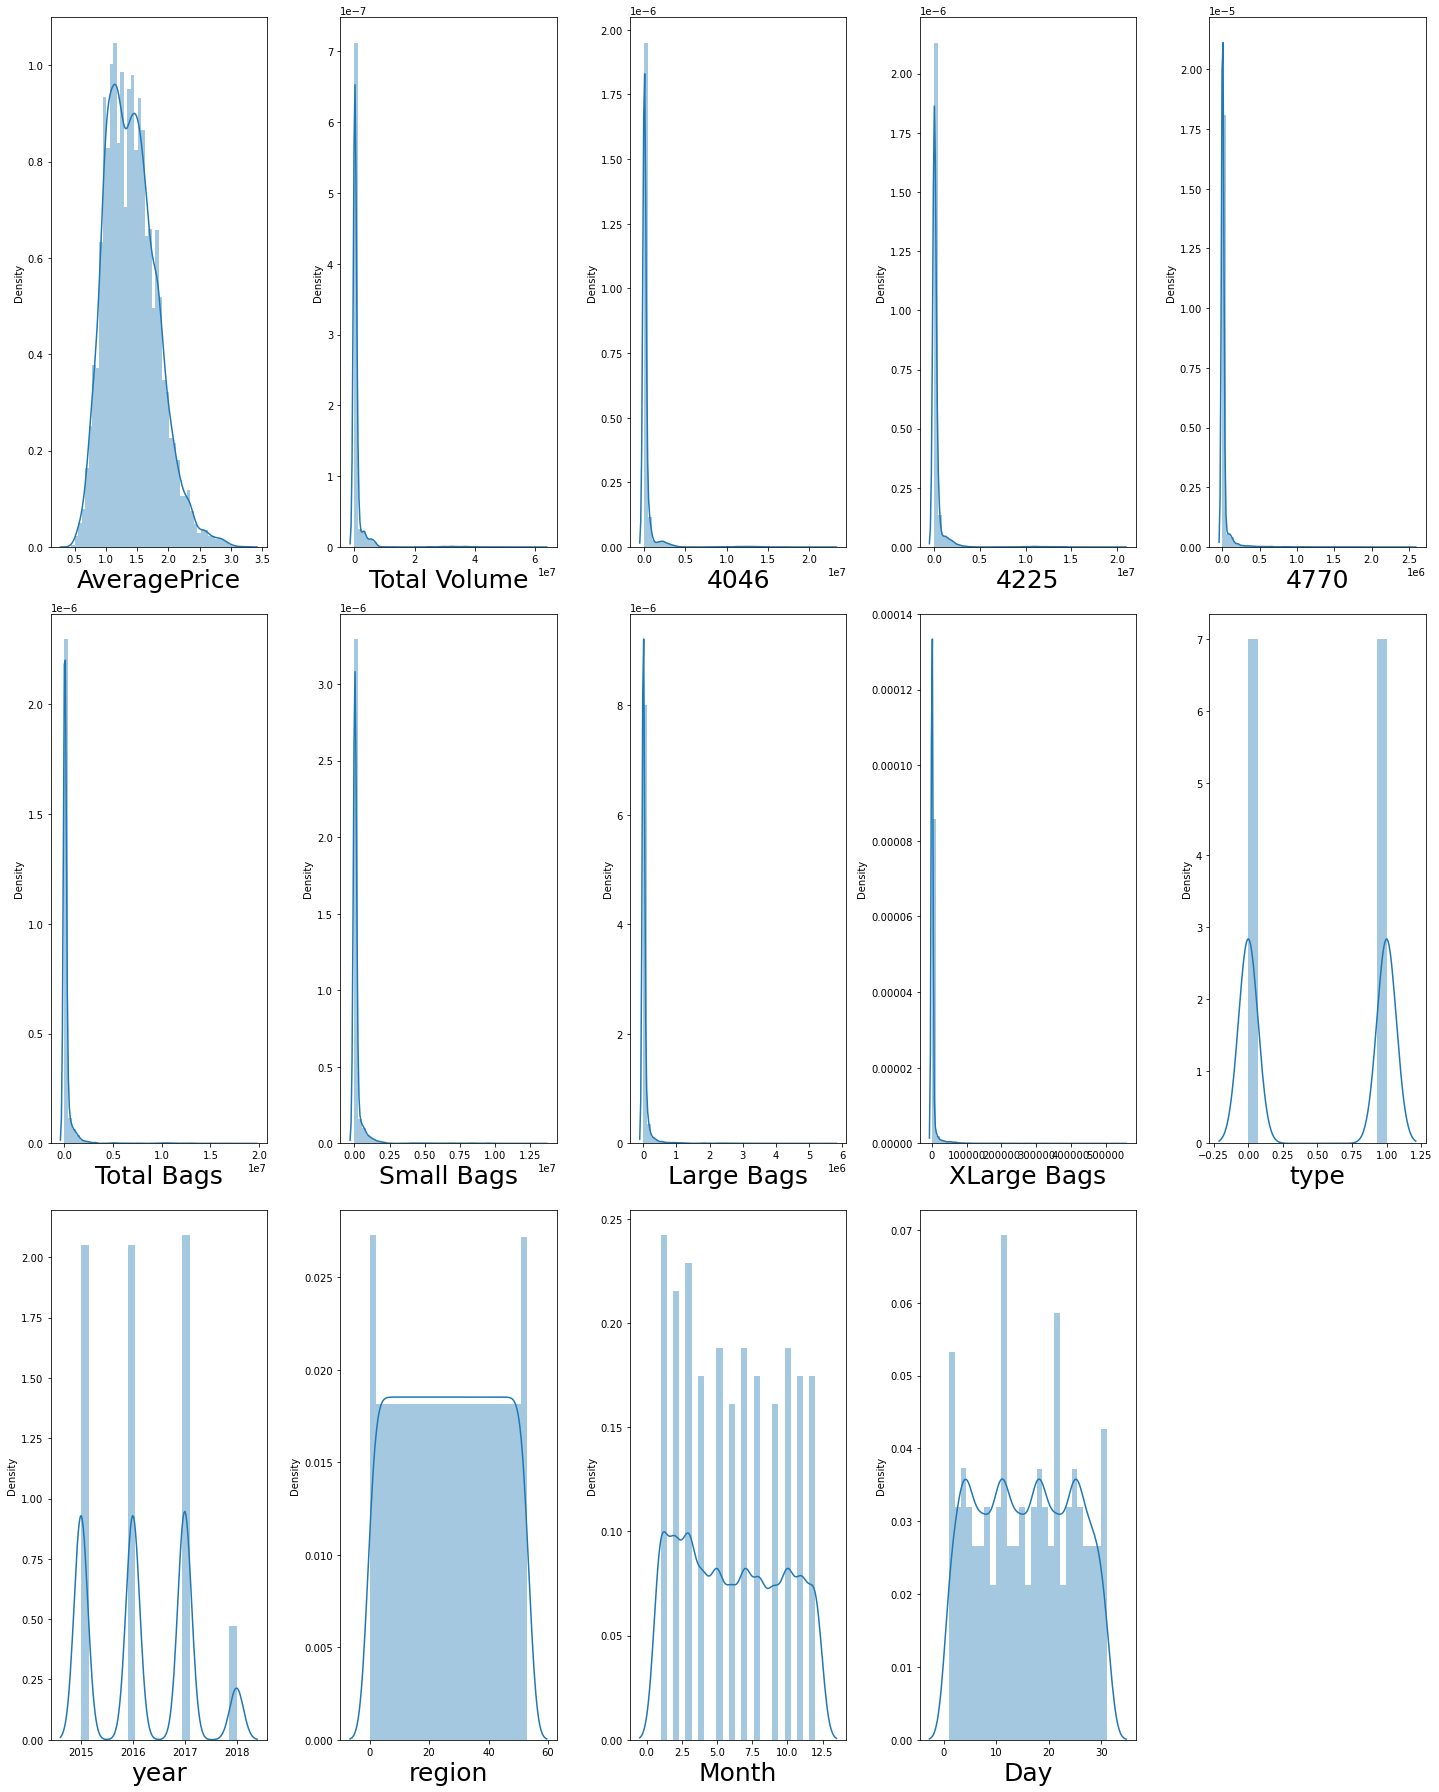

In [139]:
#Distribution Plot

plt.figure(figsize=(20,25))
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

# Feature Engineering

In [38]:
#Removing outliers using Z score

from scipy import stats
z=np.abs(stats.zscore(df1))
print(z)
print('row no. : ',np.where(z>3)[0])


[[0.18868864 0.22771641 0.23081597 ... 1.7002522  1.64763162 1.29185687]
 [0.13901962 0.23042664 0.23110251 ... 1.7002522  1.64763162 0.49423066]
 [1.18206895 0.21208462 0.23100731 ... 1.7002522  1.64763162 0.30339555]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.70081131 1.46495942 0.60817726]
 [1.30138182 0.24162464 0.2304279  ... 1.70081131 1.46495942 0.18944895]
 [0.53151208 0.24125273 0.22934712 ... 1.70081131 1.46495942 0.98707516]]
row no. :  [  346   359   780 ... 17304 17402 17428]


In [39]:
index = (np.where(z>3)[0])
df2=df1.drop(df1.index[index])


In [40]:
df2.shape

#Hence df2 is our new dataset without any outliers

(17651, 14)

In [41]:
#Now, let's proceed for model building and instantiation

#Splitting Features and Label

X = df2.drop(columns=['AveragePrice','region'],axis=1) 

#Dropping column Region 

Y = df2['AveragePrice']

In [56]:
#Splitting data into training and testing

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=100)

# MODEL BUILDING

In [43]:
#Importing Regression Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1.) LINEAR REGRESSION

In [44]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

In [45]:
from sklearn import metrics
print('MAE : ' , metrics.mean_absolute_error(Y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(Y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE :  0.22419824510733163
MSE :  0.08224757302493636
RMSE :  0.28678837672565527


In [46]:
#R2 score
lr.score(X_train,Y_train)

0.44622780251823324

<AxesSubplot:xlabel='AveragePrice'>

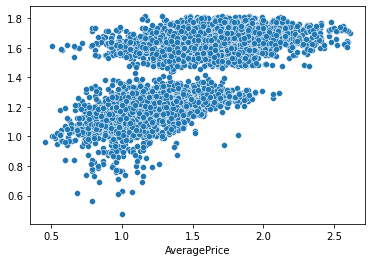

In [226]:
sns.scatterplot(Y_test,y_pred)

As there is no straight line and R2 score is also very less so I am not sure that this is the best model

 # 2.) Random Forest Regressor

In [57]:
# Checking with Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred=rfr.predict(X_test)

In [58]:
#Model confidence and R2/Adjusted R2 score

print(rfr.score(X_train,Y_train))
print(rfr.score(X_test,Y_test))

0.9810966867356455
0.8682114994086686


In [59]:
print('MAE : ' , metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE : ' , metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE :  0.09833229095853162
MSE :  0.01929138985723997
RMSE :  0.1388934478556853


<AxesSubplot:xlabel='AveragePrice'>

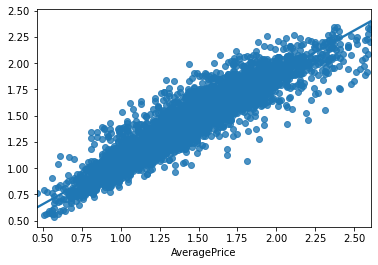

In [235]:
sns.regplot(Y_test,Y_pred)

As we can see our Model Confidence is  increased and RMSE is low as compared with linear regression model.
Also there is a linear graph between Actual and Predicted data

# 3.) DECISION TREE REGRESSOR

In [236]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
y_pred=dtr.predict(X_test)

In [249]:
#Model Confidence and R2 score

print(dtr.score(X_train,Y_train))
print(dtr.score(X_test,Y_test))

1.0
0.7156504258787626


In [238]:
print('MAE : ' , metrics.mean_absolute_error(Y_test,y_pred))
print('MSE : ' , metrics.mean_squared_error(Y_test,y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE :  0.13411511443462498
MSE :  0.041623498753682306
RMSE :  0.20401837847037776


<AxesSubplot:xlabel='AveragePrice'>

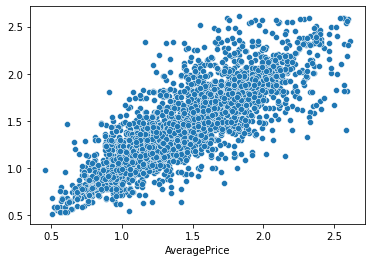

In [247]:
sns.scatterplot(Y_test,y_pred)

# 4.) SUPPORT VECTOR REGRESSOR

In [60]:
#SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

In [61]:
#Model Confidence and R2 score

print(svr.score(X_train,Y_train))
print(svr.score(X_test,Y_test))

0.41461756314519727
0.4237820548934548


In [62]:
print('MAE : ' , metrics.mean_absolute_error(Y_test,pred))
print('MSE : ' , metrics.mean_squared_error(Y_test,pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE :  0.22259614261516802
MSE :  0.0843476097831804
RMSE :  0.290426599648139


# Since, R2 score of training data is more in Decision Tree as compared with Random Forest ,Linear Regression and SVR but RMSE of Decision Tree and Linear Reg.,SVR Model is high as compared with Random Forest Regressor.

# We conclude that Random Forest Regressor is best fit Model because of less RMSE 

In [258]:
#Cross Validation Check

from sklearn.model_selection import cross_val_score

cvlr=cross_val_score(lr,X,Y,cv=5)
cvrfr=cross_val_score(rfr,X,Y,cv=5)
cvdtr=cross_val_score(dtr,X,Y,cv=5)
cvsvr=cross_val_score(svr,X,Y,cv=5)

print ('CV SCORE LR : ' , cvlr.mean())
print ('CV SCORE RFR : ' , cvrfr.mean())
print ('CV SCORE DTR : ' , cvdtr.mean())
print ('CV SCORE SVR : ' , cvsvr.mean())

CV SCORE LR :  -30.049217099337376
CV SCORE RFR :  0.2135673061567347
CV SCORE DTR :  -0.2668765133115253
CV SCORE SVR :  -0.11853612200516159


Hence after CV it is proven that we will go with Random Forest Regressor

# HYPER PARAMETER TUNING USING GRID SEARCH OF RFR:

In [261]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
print ('Current Parameters:\n')
pprint(rfr.get_params())

Current Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [352]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': (2,3),
    'max_leaf_nodes': (2,3),
    'max_samples':(1,2),
    'min_samples_leaf': (1,2),
    'min_samples_split': (2,3),
    'n_estimators': range(100,200,50),
}

In [353]:
grid = GridSearchCV(rfr
                    ,param_grid=param_grid,cv=5)
grid.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': (2, 3),
                         'max_leaf_nodes': (2, 3), 'max_samples': (1, 2),
                         'min_samples_leaf': (1, 2),
                         'min_samples_split': (2, 3),
                         'n_estimators': range(100, 200, 50)})

In [354]:
best_param = grid.best_params_
best_param

{'bootstrap': False,
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'max_samples': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [356]:
#Applying Best Parameters in our model and check 

rfr_t = RandomForestRegressor(bootstrap=False , max_depth =2 , max_samples=1,min_samples_leaf=1,
                              min_samples_split=2 ,max_leaf_nodes=3, n_estimators=150)
rfr_t.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=False, max_depth=2, max_leaf_nodes=3,
                      max_samples=1, n_estimators=150)

In [349]:
Ypred=rfr_t.predict(X_test)

In [362]:
#Model confidence and R2/Adjusted R2 score

print(rfr_t.score(X_train,Y_train))
print(rfr_t.score(X_test,Y_test))

0.9659736379844381
0.9595405863660968


Hence, after Hyperparameter tuning we achieve higher accuracy for test data and increased model efficiency.

# Saving both best fitted models

In [363]:
jl.dump(rfr_t,'Avocado.pk')

['Avocado.pk']

In [65]:
jl.dump(rfr,'Avocado_rfr.pk')

['Avocado_rfr.pk']

# Conclusion :

- With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
- Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
- I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
- I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
- The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
- I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
- I learn how to select best model and then tune it's hyperparameters to improve it's accuracy
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear,  Decision Tree and other applicable and required models to fine tune the predictions.